# Data Transformation

## Trevor Rowland :: 2-15-2025

This notebook covers the techniques covered in Lectures 1-4 from class ([Link](<>)). This includes importing data, examining missing data, computing summary statistics and developing questions about the data. The dataset used will be game-level data from [Swar's](<link to gh>) [nba_api](<>) package, containing numerical data of home and away team statistics along with categorical data about which teams were playing.

## 1. Importing Packages and Reading Data

The packages used can be installed via `pip install -r ~/project-root/projects/requirements.txt`.

In [63]:
import numpy as np
import pandas as pd
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

The data is hosted in a google drive folder, and can be accessed using the cell below

In [64]:
file_id = '1YWuRcRanepm2aI2asSWj-yRL8JubY7HA' # Obtained from the data's URL (https://drive/d/file-id/more-stuff)
url = f'https://drive.google.com/uc?id={file_id}' # Plugging the file_id into this URL allows it to be read in with pandas

df = pd.read_csv(url, encoding='utf-8') # the encoding='utf-8' param specifies how pandas reads in the csv and is required for this file

In [65]:
# file_id = '1U2UaHWRSkUXfJBn4kBHPYttd3dvw_CZF'
# url = f'https://drive.google.com/uc?id={file_id}'
# df = pd.read_csv(url, encoding='utf-8')

Let's get a quick look at the DataFrame with the `head()` function.

In [66]:
df.head(10)

,GAME_ID,HOME_ID,HOME_NAME,HOME_TRICODE,HOME_MINUTES,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_ATTEMPTED,...,AWAY_REBOUNDS_DEFENSIVE,AWAY_REBOUNDS_TOTAL,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,AWAY_FOULS_PERSONAL,AWAY_POINTS,AWAY_PLUS_MINUS_POINTS,SEASON_ID
0,40400407,1610612759,Spurs,SAS,240:00,29.0,68.0,0.426,7.0,11.0,...,26.0,34.0,17.0,8.0,6.0,6.0,24.0,74.0,-7.0,2004-05
1,40400406,1610612759,Spurs,SAS,240:00,31.0,75.0,0.413,8.0,28.0,...,27.0,40.0,19.0,6.0,8.0,5.0,21.0,95.0,9.0,2004-05
2,40400405,1610612765,Pistons,DET,265:00,37.0,84.0,0.440,2.0,9.0,...,26.0,45.0,20.0,3.0,3.0,16.0,26.0,96.0,1.0,2004-05
3,40400404,1610612765,Pistons,DET,240:00,41.0,90.0,0.456,2.0,9.0,...,32.0,44.0,15.0,1.0,9.0,17.0,21.0,71.0,-31.0,2004-05
4,40400403,1610612765,Pistons,DET,240:00,40.0,85.0,0.471,3.0,14.0,...,27.0,37.0,16.0,7.0,3.0,18.0,21.0,79.0,-17.0,2004-05
5,40400402,1610612759,Spurs,SAS,240:00,29.0,62.0,0.468,11.0,24.0,...,27.0,45.0,17.0,5.0,2.0,13.0,25.0,76.0,-21.0,2004-05
6,40400401,1610612759,Spurs,SAS,240:00,34.0,79.0,0.430,4.0,13.0,...,24.0,35.0,15.0,12.0,10.0,12.0,19.0,69.0,-15.0,2004-05
7,40400307,1610612748,Heat,MIA,240:00,32.0,69.0,0.464,2.0,11.0,...,28.0,41.0,21.0,7.0,0.0,13.0,23.0,88.0,6.0,2004-05
8,40400306,1610612765,Pistons,DET,240:00,36.0,86.0,0.419,7.0,17.0,...,35.0,40.0,15.0,1.0,10.0,16.0,20.0,66.0,-25.0,2004-05
9,40400305,1610612748,Heat,MIA,240:00,36.0,69.0,0.522,3.0,8.0,...,27.0,40.0,16.0,6.0,5.0,15.0,23.0,76.0,-12.0,2004-05


And the size of the data can be found with the `pd.DataFrame.shape` attribute.

In [67]:
rownums, colnums = df.shape
print(f'there are {colnums} columns and {rownums} rows in the dataframe')

there are 48 columns and 27657 rows in the dataframe


## Examining the Dataset I :: Checking for Missing Data

The `missingno` package is an excellent way to quickly visualize the dataset and see what data are missing. The following cell creates the missingno `matrix` chart, where missing data are shown in the chart.

<Axes: >

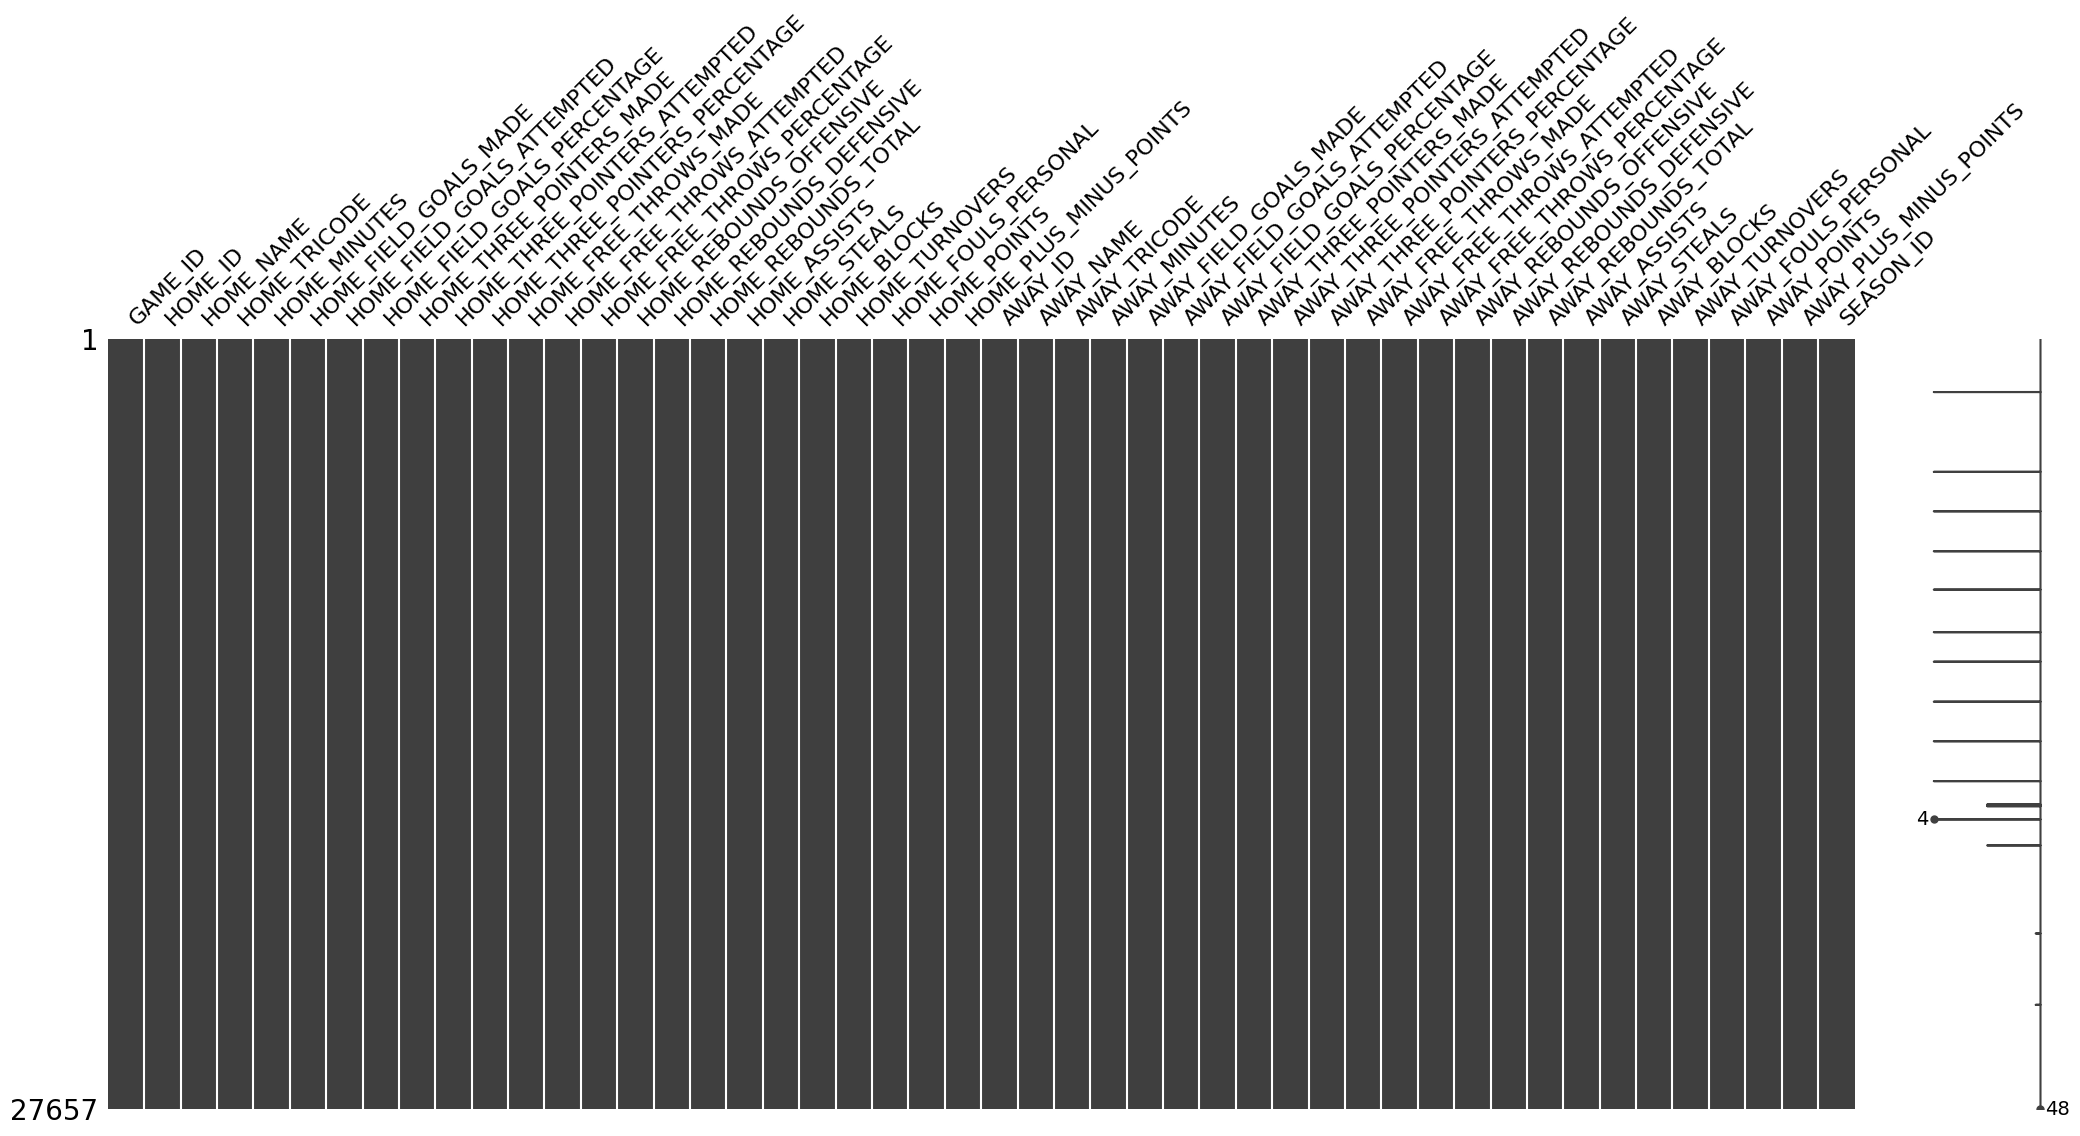

In [68]:
msgo.matrix(df)

From the missingno chart, there appears to be no data missing. The main chart is fully filled with grey, indicating the chart has little to no missing data (missing data appears as whitespace). However, the frequency table to the right of the main chart has some spikes on it, indicating that there may be small amounts of missing data. An amplitude on the frequency chart indicates missing data, so some null values may exist. We can confirm this by counting the number of NA values in the data below.

In [69]:
df.isna().sum().sum() # Get the total number of missing vals

598

At the time of writing this, we have 598 missing values in the data. We can see the breakdown of missing values by feature below.

In [70]:
nan_counts_df = pd.DataFrame({'Column': df.isna().sum().index, 'NaN Count': df.isna().sum().values})
nan_counts_df['NaN Percentage'] = (nan_counts_df['NaN Count'] / len(df)) * 100
nan_counts_df.sort_values(by='NaN Percentage', ascending=False).T

,4,27,22,13,23,21,20,19,18,17,...,29,28,26,25,46,45,0,24,1,47
Column,HOME_MINUTES,AWAY_MINUTES,HOME_POINTS,HOME_FREE_THROWS_PERCENTAGE,HOME_PLUS_MINUS_POINTS,HOME_FOULS_PERSONAL,HOME_TURNOVERS,HOME_BLOCKS,HOME_STEALS,HOME_ASSISTS,...,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_MADE,AWAY_TRICODE,AWAY_NAME,AWAY_PLUS_MINUS_POINTS,AWAY_POINTS,GAME_ID,AWAY_ID,HOME_ID,SEASON_ID
NaN Count,16,15,14,14,14,14,14,14,14,14,...,13,13,13,13,13,13,0,0,0,0
NaN Percentage,0.057852,0.054236,0.05062,0.05062,0.05062,0.05062,0.05062,0.05062,0.05062,0.05062,...,0.047004,0.047004,0.047004,0.047004,0.047004,0.047004,0.0,0.0,0.0,0.0


Now we have a detailed breakdown of what columns are missing by counts of missing values and percentages, sorted by the highest amounts of missing values.

Given that the highest percentage of missing data is .05% of over 27,000 rows of data, we can safely remove the missing data without worrying about compromising our sample. This can be done with the `pd.DataFrame.dropna()` function.

In [71]:
df = df.dropna()

In [72]:
rownums_post_drop, colnums_post_drop = df.shape
print(f'there are now {colnums_post_drop} columns and {rownums_post_drop} rows in the DataFrame vs. {rownums} rows initially.')

there are now 48 columns and 27639 rows in the DataFrame vs. 27657 rows initially.


## Examining the Data II :: Summary Statistics

Now that the data has been cleaned, we can examine the summary statistics of the dataset to begin forming observations and hypotheses.

In [73]:
summ_stats_df = df.drop(['GAME_ID','HOME_ID','AWAY_ID'], axis=1)
# summ_stats_df = df.drop(['game_id','home_id','AWAY_ID'], axis=1)
summ_stats_df.describe().rename({'25%':'1Q','50%':'median','75%':'3Q'}).T

,count,mean,std,min,1Q,median,3Q,max
HOME_FIELD_GOALS_MADE,27639.0,38.735157,5.627938,1.000,35.000,39.000,42.000,84.000
HOME_FIELD_GOALS_ATTEMPTED,27639.0,83.766055,8.248487,5.000,78.000,84.000,89.000,146.000
HOME_FIELD_GOALS_PERCENTAGE,27639.0,0.463231,0.056759,0.200,0.424,0.462,0.500,0.747
HOME_THREE_POINTERS_MADE,27639.0,8.787040,4.345167,0.000,6.000,8.000,12.000,42.000
HOME_THREE_POINTERS_ATTEMPTED,27639.0,24.377401,9.717949,1.000,17.000,23.000,31.000,97.000
HOME_THREE_POINTERS_PERCENTAGE,27639.0,0.357476,0.108043,0.000,0.286,0.357,0.429,1.000
HOME_FREE_THROWS_MADE,27639.0,18.590542,6.365900,0.000,14.000,18.000,23.000,51.000
HOME_FREE_THROWS_ATTEMPTED,27639.0,24.399761,7.907445,0.000,19.000,24.000,29.000,64.000
HOME_FREE_THROWS_PERCENTAGE,27639.0,0.763126,0.100967,0.000,0.700,0.769,0.833,1.000
HOME_REBOUNDS_OFFENSIVE,27639.0,10.847172,3.928657,0.000,8.000,11.000,13.000,44.000


In [74]:
cols_of_interest = ['HOME_POINTS','AWAY_POINTS','HOME_PLUS_MINUS_POINTS','AWAY_PLUS_MINUS_POINTS','HOME_FIELD_GOALS_PERCENTAGE', 'AWAY_FIELD_GOALS_PERCENTAGE','HOME_THREE_POINTERS_PERCENTAGE','AWAY_THREE_POINTERS_PERCENTAGE','HOME_FREE_THROWS_PERCENTAGE','AWAY_FREE_THROWS_PERCENTAGE','HOME_REBOUNDS_DEFENSIVE','AWAY_REBOUNDS_DEFENSIVE']

In [75]:
summ_stats_df = summ_stats_df[cols_of_interest]

This works, but a visual representation should be used to better see the distributions of the data.

In [76]:
numeric_cols = summ_stats_df.select_dtypes(include=['number'])
print(numeric_cols.columns.tolist())

['HOME_POINTS', 'AWAY_POINTS', 'HOME_PLUS_MINUS_POINTS', 'AWAY_PLUS_MINUS_POINTS', 'HOME_FIELD_GOALS_PERCENTAGE', 'AWAY_FIELD_GOALS_PERCENTAGE', 'HOME_THREE_POINTERS_PERCENTAGE', 'AWAY_THREE_POINTERS_PERCENTAGE', 'HOME_FREE_THROWS_PERCENTAGE', 'AWAY_FREE_THROWS_PERCENTAGE', 'HOME_REBOUNDS_DEFENSIVE', 'AWAY_REBOUNDS_DEFENSIVE']


['HOME_POINTS', 'AWAY_POINTS', 'HOME_PLUS_MINUS_POINTS', 'AWAY_PLUS_MINUS_POINTS', 'HOME_FIELD_GOALS_PERCENTAGE', 'AWAY_FIELD_GOALS_PERCENTAGE', 'HOME_THREE_POINTERS_PERCENTAGE', 'AWAY_THREE_POINTERS_PERCENTAGE', 'HOME_FREE_THROWS_PERCENTAGE', 'AWAY_FREE_THROWS_PERCENTAGE', 'HOME_REBOUNDS_DEFENSIVE', 'AWAY_REBOUNDS_DEFENSIVE']


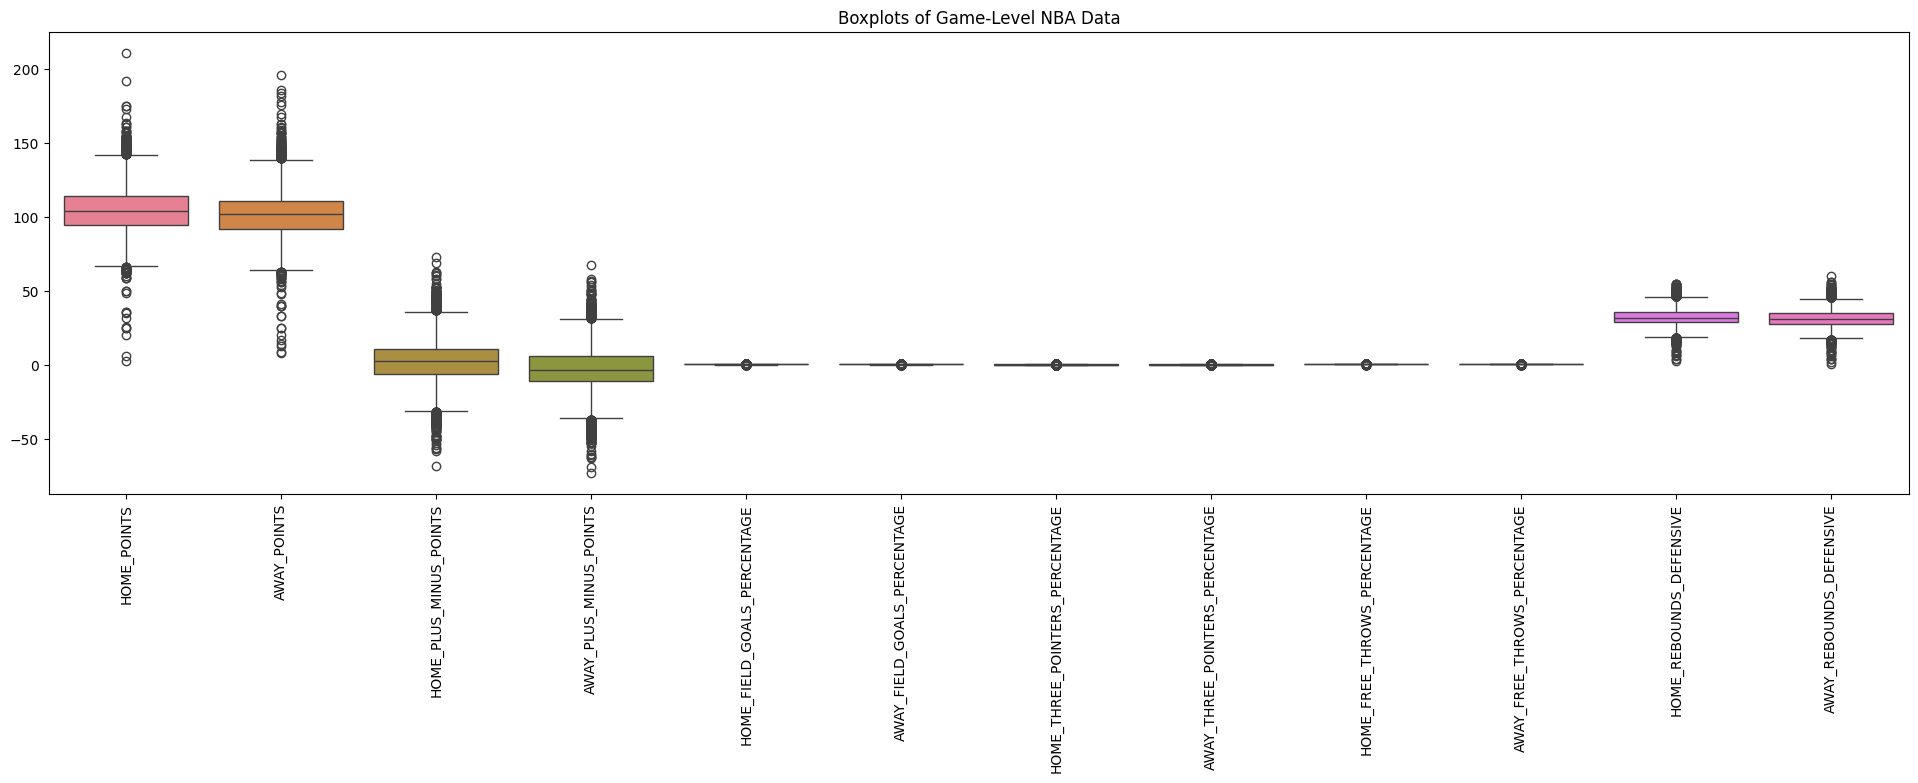

In [77]:
numeric_cols = summ_stats_df.select_dtypes(include=['number'])
print(numeric_cols.columns.tolist())
plt.figure(figsize=(24, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=90) # rotate the tick labels

plt.title('Boxplots of Game-Level NBA Data')
plt.show()

This is good, but removing outliers and sorting the chart by some measures could help. Let's start by removing the outliers, then re-plotting with distributions sorted by variance.

In [78]:
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), np.nan)
    return cleaned_df

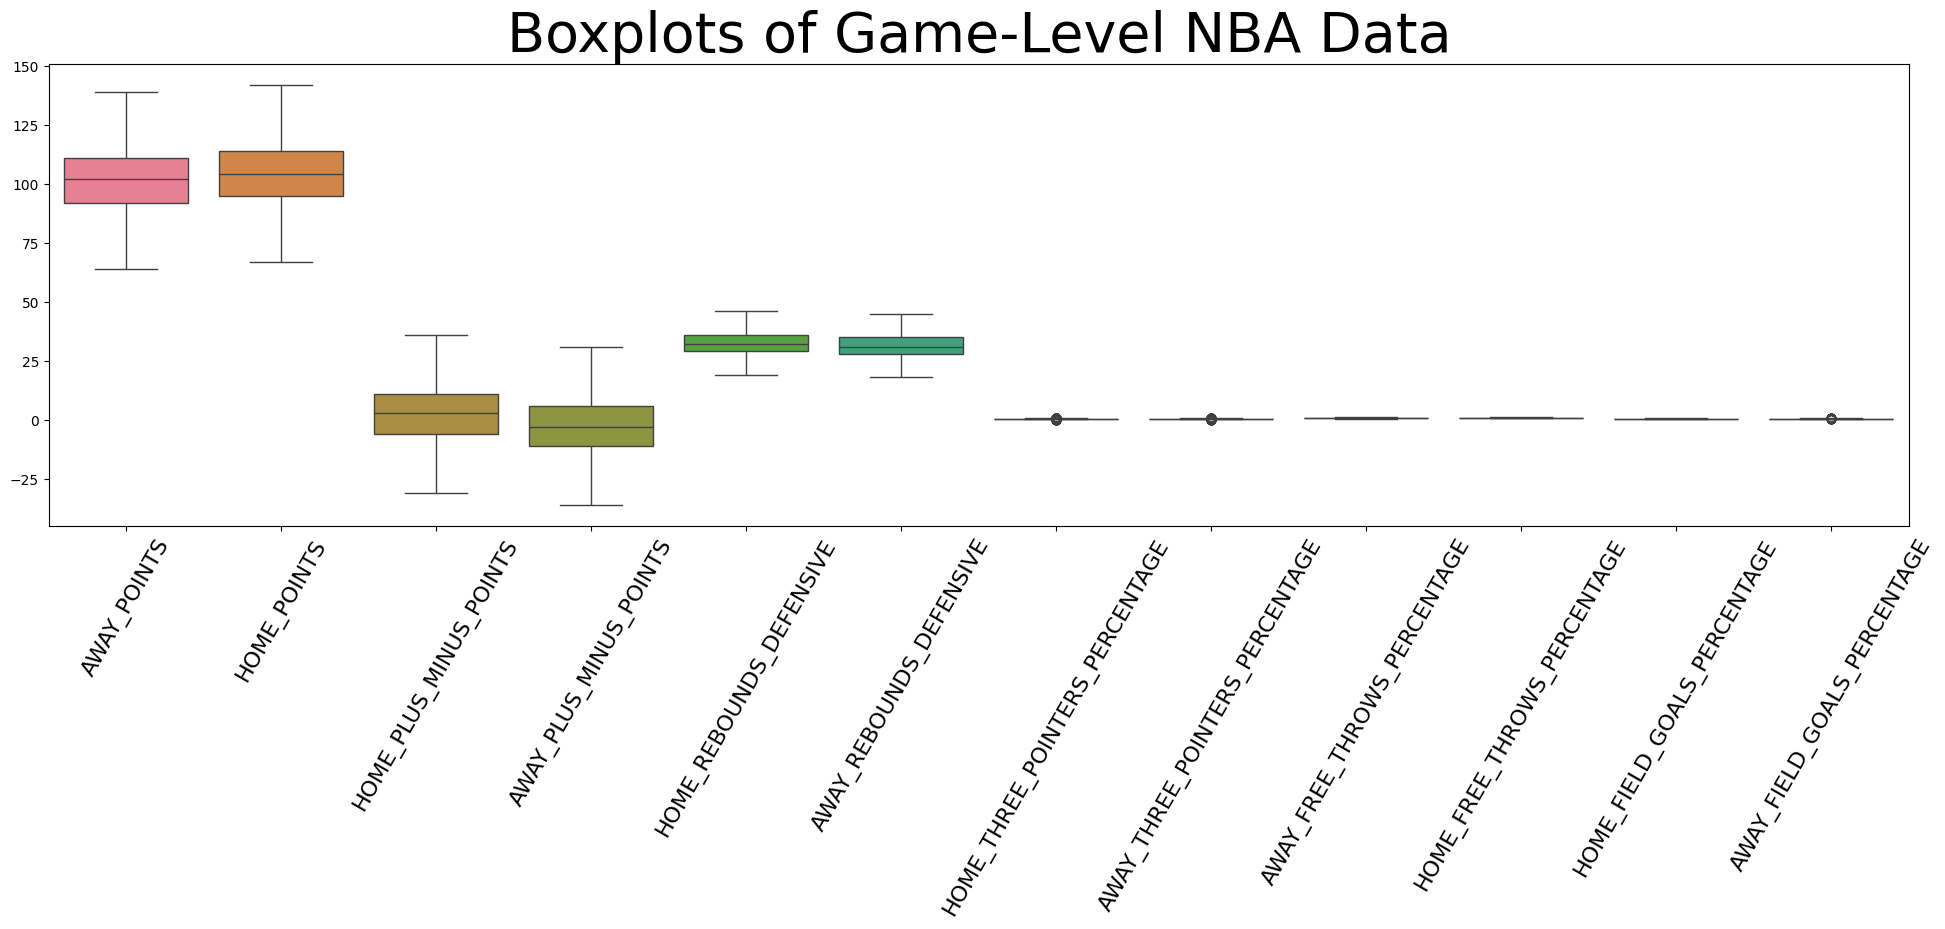

In [92]:
bp_df = remove_outliers(numeric_cols)

# Compute Variance and Sort Boxplots by variance
variances = numeric_cols.var().sort_values(ascending=False)
bp_df = bp_df[variances.index]

# Plot
plt.figure(figsize=(24, 6))
sns.boxplot(data=bp_df)
plt.xticks(rotation=60, fontsize=16) # rotate the tick labels

plt.title('Boxplots of Game-Level NBA Data', fontsize=40)
plt.show()

Now that the box plots have been cleaned up, the data can be examined to form questions and hypotheses. The following notes outline the next steps of the data analysis, where we will examine:

### High-Variance and Low-Variance Stats

High-variance distributions are an area of interest to pursue, as they are the most **variable**, and could suggest inconsistencies in performance or playing style across teams. This could drive unpredictability in games. Inversely, low-variance statistics could indicate that these stats follow a pattern. These low-variance stats could be stable indicators of performance (good or bad) for a team.

### Skewed Distributions

Skewed distributions could indicate extreme or uncommon events within the dataset. This could be an explosive performance by a player or team, and the tails of these distributions should be examined to determine what kind of event is occurring.

### Outlier-Prone Stats

Outliers indicate rare events, and this dataset is full of them. In the plot including the outliers, we see that all of the boxplots have outliers, now we need to examine the filtered boxplots to see if there are any extrema within each distribution. This may be lumped in with skewed distributions as those also indicate rare events, although examining the outliers beyond the whiskers of each boxplot may be something to examine as well.

### Stats with Overlapping IQR

When statistics have overlapping or equal Interquartile Ranges (IQR), it could either indicate redundancy or high correlation. By examining features with overlapping IQR, we can identify highly correlated variables, as well as redundant features that could lead to overfitting if used in a model for future presentations.

## Ideas for Testing

- Distributions, Means, and Variances for Home vs Away Teams win percentages
  - Group by Home vs Away
  - Check Dists for Home and Away using qqplot, then AD/SW tests
  - If Normal, check Means with T Test and Variances with F Test
  - Report Results

# Creating games_df

## Shake 2-15-2025


Since `df` has a certain symmetry (referring to the HOME_ and AWAY_ prefixes) the goal of this section is to isolate the home and away stats into `home_df`/`away_df`; standardize the column names; and merge them into `games_df`

In [80]:
df.columns

Index(['GAME_ID', 'HOME_ID', 'HOME_NAME', 'HOME_TRICODE', 'HOME_MINUTES',
       'HOME_FIELD_GOALS_MADE', 'HOME_FIELD_GOALS_ATTEMPTED',
       'HOME_FIELD_GOALS_PERCENTAGE', 'HOME_THREE_POINTERS_MADE',
       'HOME_THREE_POINTERS_ATTEMPTED', 'HOME_THREE_POINTERS_PERCENTAGE',
       'HOME_FREE_THROWS_MADE', 'HOME_FREE_THROWS_ATTEMPTED',
       'HOME_FREE_THROWS_PERCENTAGE', 'HOME_REBOUNDS_OFFENSIVE',
       'HOME_REBOUNDS_DEFENSIVE', 'HOME_REBOUNDS_TOTAL', 'HOME_ASSISTS',
       'HOME_STEALS', 'HOME_BLOCKS', 'HOME_TURNOVERS', 'HOME_FOULS_PERSONAL',
       'HOME_POINTS', 'HOME_PLUS_MINUS_POINTS', 'AWAY_ID', 'AWAY_NAME',
       'AWAY_TRICODE', 'AWAY_MINUTES', 'AWAY_FIELD_GOALS_MADE',
       'AWAY_FIELD_GOALS_ATTEMPTED', 'AWAY_FIELD_GOALS_PERCENTAGE',
       'AWAY_THREE_POINTERS_MADE', 'AWAY_THREE_POINTERS_ATTEMPTED',
       'AWAY_THREE_POINTERS_PERCENTAGE', 'AWAY_FREE_THROWS_MADE',
       'AWAY_FREE_THROWS_ATTEMPTED', 'AWAY_FREE_THROWS_PERCENTAGE',
       'AWAY_REBOUNDS_OFFENSIVE', 'AWAY_

The only columns without a `HOME_` or `AWAY_` prefix are `GAME_ID` and `SEASON_ID`, so they will show up in `home_df` and `away_df`. 


The plan is to have `home_df` house all the `HOME_` prefixed columns + `AWAY_POINTS` columns + two mentioned ^^. Same principal for `away_df` 


In [81]:
home_df_columns = ['GAME_ID', 'SEASON_ID']  + [col for col in df.columns if col.startswith('HOME_')] + ['AWAY_POINTS']

away_df_columns = ['GAME_ID', 'SEASON_ID']  + [col for col in df.columns if col.startswith('AWAY_')] + ['HOME_POINTS']

assert len(home_df_columns)  == len(away_df_columns)

Now going to create `home_df` and `away_df` adding an extra binary column `IS_HOME` (this var will differentiate the two groups once in `games_df`)

In [82]:
home_df = df[home_df_columns]
home_df.loc[:,'IS_HOME'] = 1


away_df = df[away_df_columns]
away_df.loc[:,'IS_HOME'] = 0

/var/folders/b6/zrz7f_vs0k79qphqm5sprhzr0000gn/T/ipykernel_10492/1964766385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.loc[:,'IS_HOME'] = 1
/var/folders/b6/zrz7f_vs0k79qphqm5sprhzr0000gn/T/ipykernel_10492/1964766385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df.loc[:,'IS_HOME'] = 0


Not messing with this warning rn

Next up is to standardize the columns names between two dfs by replacing the `HOME_`/`AWAY_` prefix wherever applicable

In [83]:
home_df.columns

Index(['GAME_ID', 'SEASON_ID', 'HOME_ID', 'HOME_NAME', 'HOME_TRICODE',
       'HOME_MINUTES', 'HOME_FIELD_GOALS_MADE', 'HOME_FIELD_GOALS_ATTEMPTED',
       'HOME_FIELD_GOALS_PERCENTAGE', 'HOME_THREE_POINTERS_MADE',
       'HOME_THREE_POINTERS_ATTEMPTED', 'HOME_THREE_POINTERS_PERCENTAGE',
       'HOME_FREE_THROWS_MADE', 'HOME_FREE_THROWS_ATTEMPTED',
       'HOME_FREE_THROWS_PERCENTAGE', 'HOME_REBOUNDS_OFFENSIVE',
       'HOME_REBOUNDS_DEFENSIVE', 'HOME_REBOUNDS_TOTAL', 'HOME_ASSISTS',
       'HOME_STEALS', 'HOME_BLOCKS', 'HOME_TURNOVERS', 'HOME_FOULS_PERSONAL',
       'HOME_POINTS', 'HOME_PLUS_MINUS_POINTS', 'AWAY_POINTS', 'IS_HOME'],
      dtype='object')

In [84]:
new_column_names = [
    'GAME_ID', 
    'SEASON_ID', 
    'TEAM_ID', 
    'TEAM_NAME', 
    'TEAM_TRICODE',
    'MINUTES', 
    'FIELD_GOALS_MADE', 
    'FIELD_GOALS_ATTEMPTED',
    'FIELD_GOALS_PERCENTAGE', 
    'THREE_POINTERS_MADE',
    'THREE_POINTERS_ATTEMPTED', 
    'THREE_POINTERS_PERCENTAGE',
    'FREE_THROWS_MADE', 
    'FREE_THROWS_ATTEMPTED',
    'FREE_THROWS_PERCENTAGE', 
    'REBOUNDS_OFFENSIVE',
    'REBOUNDS_DEFENSIVE', 
    'REBOUNDS_TOTAL', 
    'ASSISTS',
    'STEALS', 
    'BLOCKS', 
    'TURNOVERS', 
    'FOULS_PERSONAL',
    'POINTS', 
    'PLUS_MINUS_POINTS', 
    'OPP_POINTS', # replacing prefix with OPP for opponent points
    'IS_HOME'    
]

assert len(new_column_names) == len(away_df.columns)
assert len(new_column_names) == len(home_df.columns) 

Performing the renaming. Both `home_df` and `away_df` should have the same columns now 

In [85]:
home_df = home_df.rename(
    columns=dict(zip(list(home_df.columns), new_column_names))
)

away_df = away_df.rename(
    columns=dict(zip(list(away_df.columns), new_column_names))
)


assert list(home_df.columns) == list(away_df.columns)

Now ready to create `games_df` by simply concatenating `home_df` and `away_df` 

In [86]:
games_df = pd.concat([home_df, away_df], ignore_index=True)

assert len(games_df) == len(df) *2

games_df.head()

,GAME_ID,SEASON_ID,TEAM_ID,TEAM_NAME,TEAM_TRICODE,MINUTES,FIELD_GOALS_MADE,FIELD_GOALS_ATTEMPTED,FIELD_GOALS_PERCENTAGE,THREE_POINTERS_MADE,...,REBOUNDS_TOTAL,ASSISTS,STEALS,BLOCKS,TURNOVERS,FOULS_PERSONAL,POINTS,PLUS_MINUS_POINTS,OPP_POINTS,IS_HOME
0,40400407,2004-05,1610612759,Spurs,SAS,240:00,29.0,68.0,0.426,7.0,...,38.0,14.0,4.0,7.0,13.0,20.0,81.0,7.0,74.0,1
1,40400406,2004-05,1610612759,Spurs,SAS,240:00,31.0,75.0,0.413,8.0,...,43.0,15.0,3.0,2.0,11.0,18.0,86.0,-9.0,95.0,1
2,40400405,2004-05,1610612765,Pistons,DET,265:00,37.0,84.0,0.440,2.0,...,42.0,17.0,7.0,11.0,11.0,20.0,95.0,-1.0,96.0,1
3,40400404,2004-05,1610612765,Pistons,DET,240:00,41.0,90.0,0.456,2.0,...,47.0,23.0,13.0,6.0,3.0,22.0,102.0,31.0,71.0,1
4,40400403,2004-05,1610612765,Pistons,DET,240:00,40.0,85.0,0.471,3.0,...,44.0,22.0,12.0,10.0,11.0,18.0,96.0,17.0,79.0,1


`games_df` is twice the length of `df` since each row of `df` was split into a home and away row housed in `games_df`. You would need a composite key of (GAME_ID, TEAM_XXXX) to locate info about a specific game

Additionally adding a binary `WON` column to indicate if team won the game. Logic is basically checking if `POINTS` is greater than `OPP_POINTS`

In [87]:
games_df['WON'] = (games_df['POINTS'] > games_df['OPP_POINTS']).astype(int)